In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('../data_fleet.csv', sep='\t')
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
df=data.drop('Driver_ID', axis=1)
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [5]:
k1=df['Distance_Feature'].values
k2=df['Speeding_Feature'].values

X=np.matrix(list(zip(k1,k2)))
kmeans=KMeans(n_clusters=2).fit(X)

In [6]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [8]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
centroids

array([[  50.04763437,    8.82875   ],
       [ 180.017075  ,   18.29      ]])

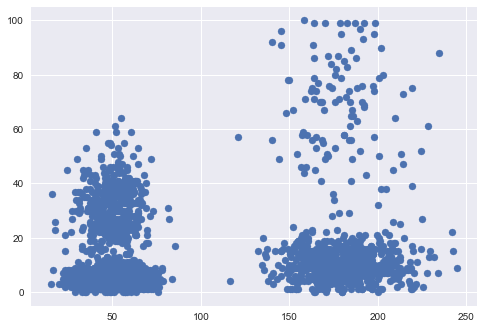

In [10]:
plt.scatter(df.Distance_Feature,df.Speeding_Feature)
plt.show()

### The scikit-learn package also has a function that allows you to get the centroids and labels directly

In [11]:
from sklearn import cluster
centroids,labels,inertia = cluster.k_means(df,n_clusters=2)

In [12]:
# save the cluster labels and sort by cluster
df['cluster'] = labels
df.sort('cluster')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Distance_Feature,Speeding_Feature,cluster
3999,168.03,9.0,0
3471,171.15,5.0,0
3470,190.06,19.0,0
3469,193.40,12.0,0
3468,177.63,7.0,0
3467,207.08,4.0,0
3466,158.71,9.0,0
3465,206.47,21.0,0
3464,164.26,11.0,0
3463,161.32,9.0,0


In [13]:
df.groupby('cluster').mean()

,Distance_Feature,Speeding_Feature
cluster,,
0,180.017075,18.29000
1,50.047634,8.82875


In [14]:
# save the DataFrame of cluster centers
centers = df.groupby('cluster').mean()

In [15]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

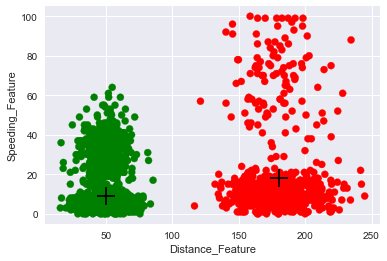

In [16]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green'])
# scatter plot colored by cluster 
plt.scatter(df.Distance_Feature, df.Speeding_Feature, c=colors[list(df.cluster)], s=50)

plt.scatter(centers.Distance_Feature, centers.Speeding_Feature, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
